# Solução para o problema

Importamos a biblioteca **sklearn**, **pandas** e **graphviz**. Para lidar com as funções de busca em árvore de decisão, processamento de dados e visualização de árvores, respectivamente.

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris
import pandas
import graphviz
import matplotlib.pyplot as plt
import seaborn

### Separação de Parâmetros

Utilizamos como base de dados a tabela resultante da análise exploratória, dividindo-a nas seguintes tabelas:

* `*_fraud`: Apresenta todas as informações a serem analisadas sobre as operações em que ocorreram fraudes.
* `*_non_fraud`: Apresenta todas as informações a serem analisadas sobre as operações em que **não** ocorreram fraudes.

Ambas foram divididas em `x` e `y`, onde `y` é a tabela que possui somente o atributo-alvo `isFraud` de cada operação, para uma criação facilitada da árvore.

In [2]:
data = pandas.read_csv('reduced_data.csv')
feature_labels = ['hasMerchantAccount', 'simplified_type', 'amount', 'oldbalanceOrg', 
                  'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fraud_transactions = data.loc[data['isFraud'] == 1]
x_fraud = fraud_transactions[feature_labels]
y_fraud = fraud_transactions['isFraud']

non_fraud_transactions = data.loc[data['isFraud'] == 0]
x_non_fraud = non_fraud_transactions[feature_labels]
y_non_fraud = non_fraud_transactions['isFraud']

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
print(len(x_fraud))
print(len(x_non_fraud))

8213
6354407


### Espaço de Treinamento e Espaço de Testes

Para o espaço de treinamento, decidimos atribuir de forma proporcinal a quantidade de fraudes e não fraudes.

Desta forma, permitimos que a árvore identifique as diferentes casos possíveis para ambos os resultados, evitando o **sobreajuste**.

Reduzimos o espaço de amostras nas tabelas `*_train`, para realizar o treinamento da árvore, e `*_non_fraud_test_`, para receber o resto do espaço como casos de testes:

In [ ]:
# Utilizando 8000 casos (4000 fraudes e 4000 não fraudes)

x_train = pandas.concat([x_fraud[:4000], x_non_fraud[:4000]])
y_train = pandas.concat([y_fraud[:4000], y_non_fraud[:4000]])

# Separando os casos não utilizados no treinamento para realização de testes

x_fraud_test = x_fraud[4000:]
y_fraud_test = y_fraud[4000:]
x_non_fraud_test = x_non_fraud[4000:]
y_non_fraud_test = y_non_fraud[4000:]

### Criação da Árvore de Decisão

Para a criação da árvore, foi definido como critério a **entropia** dos dados e a **especificação de profundidade**, realizando de forma prática a poda da árvore de decisão.

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(x_train, y_train)

y_fraud_prediction     = clf.predict(x_fraud_test)
y_non_fraud_prediction = clf.predict(x_non_fraud_test)

Avaliando a acurácia da árvore de decisão criada:

In [ ]:
print('Acurácia para casos com fraude: ', metrics.accuracy_score(y_fraud_test, y_fraud_prediction))
print('Acurácia para casos sem fraude: ', metrics.accuracy_score(y_non_fraud_test, y_non_fraud_prediction))

Acurácia para casos com fraude:  1.0
Acurácia para casos sem fraude:  0.8027756331208378


Representamos como exemplo de resultado a árvore de decisão abaixo:

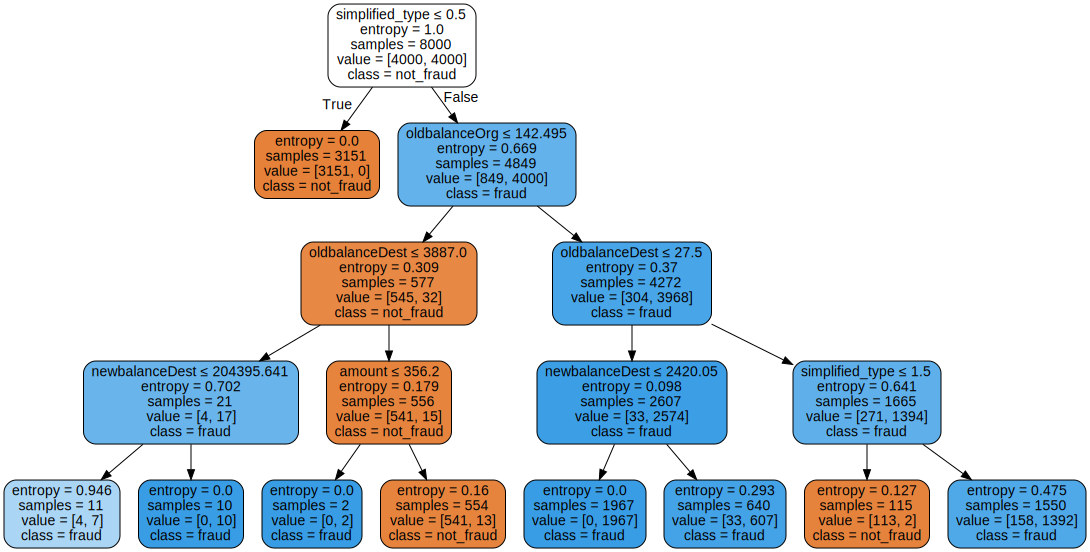

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_labels, class_names=['not_fraud', 'fraud'], 
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph 

### Avaliando Diferentes Resultados

A partir destes resultados, podemos avaliar as diferentes precisões resultantes com mudanças de parâmetros como `*_train` e `max_deph`.

In [ ]:
# Utilizando (4000+size) casos (4000 fraudes e size não fraudes)
fraud_accuracy = []
non_fraud_accuracy = []
for size in range(4000, 22000, 2000):
    x_train = pandas.concat([x_fraud[:4000], x_non_fraud[:size]])
    y_train = pandas.concat([y_fraud[:4000], y_non_fraud[:size]])

    # Separando os casos não utilizados no treinamento para realização de testes

    x_fraud_test = x_fraud[4000:]
    y_fraud_test = y_fraud[4000:]
    x_non_fraud_test = x_non_fraud[size:]
    y_non_fraud_test = y_non_fraud[size:]
    
    fraud_accuracy_depth = []
    non_fraud_accuracy_depth = []
    for depth in range(3, 19, 1):
        clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
        clf = clf.fit(x_train, y_train)

        y_fraud_prediction     = clf.predict(x_fraud_test)
        y_non_fraud_prediction = clf.predict(x_non_fraud_test)
        
        fraud_accuracy_depth.append(metrics.accuracy_score(y_fraud_test, y_fraud_prediction))
        non_fraud_accuracy_depth.append(metrics.accuracy_score(y_non_fraud_test, y_non_fraud_prediction))
    
    fraud_accuracy.append(fraud_accuracy_depth)
    non_fraud_accuracy.append(non_fraud_accuracy_depth)

print(fraud_accuracy)
print(non_fraud_accuracy_depth)

[[0.9976263944932352, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.973652978874911, 0.9995252788986471, 0.9995252788986471, 0.9995252788986471, 0.9995252788986471, 0.9995252788986471, 0.9995252788986471, 0.9995252788986471, 0.9995252788986471, 0.9992879183479706, 0.9978637550439117, 0.9988131972466177, 0.9978637550439117, 0.9992879183479706, 0.9988131972466177], [1.0, 0.973652978874911, 0.9995252788986471, 0.9995252788986471, 0.9995252788986471, 0.9995252788986471, 0.9995252788986471, 0.9990505577972941, 0.9981011155945881, 0.9992879183479706, 0.9978637550439117, 0.9981011155945881, 0.9983384761452646, 0.9978637550439117, 0.9978637550439117, 0.9969143128412058], [0.973178257773558, 0.9959648706384999, 0.9990505577972941, 0.9990505577972941, 0.9990505577972941, 0.9981011155945881, 0.9983384761452646, 0.9973890339425587, 0.9981011155945881, 0.9962022311891764, 0.9964395917398529, 0.9981011155945881, 0.9971516733918823, 0.9976263944932352, 0.99691431

In [ ]:
accuracy = [x*100 for x in fraud_accuracy]

fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(accuracy, annot=True)
ax.set_ylabel('Entradas não fraudulentas', fontsize=20)
ax.set_xlabel('Profundidade da árvore', fontsize=20)
ax.set_title('Acurácia para testes fraudulentos', fontsize=20)
ax.set_yticklabels(range(4000,22000,2000))
ax.set_xticklabels(range(3, 19,1))
fig.savefig('testes_fraudulentos_acuracia.jpg')

NameError: name 'fraud_accuracy' is not defined